In [ ]:
import pandas as pd
import csv
import numpy 
import time 
from math import radians, cos, sin, asin, sqrt
import re, math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:


df = pd.DataFrame.from_csv('D:/Nanohub/TribeFlow/TF_location_2015.csv', sep ='\t', encoding = 'UTF-8', header = None)
df.columns = ['ip','resource id','datetime','latitude','longitude']

In [ ]:
df_unique_ip = df.drop_duplicates(subset = 'ip', keep = 'first')

In [ ]:
df_unique_ip

In [30]:
print(len(df) , len(df_unique_ip))

29529 5329


In [31]:
long_dist = []
lat_dist = []
for index,row in df.iterrows():
    lat_dist.append(row['latitude'])
    long_dist.append(row['longitude'])

In [32]:
print (len(long_dist))

29529


In [33]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) returned as kilometers 
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [75]:
haversine(-86.9237,40.4427,-86.9237, 40.4427)

0.0

(array([   23.,  3472.,   248.,  1351.,    62.,   229.,  1869.,   345.,
         1607.,   911.,   796.,  1587.,  2807.,  3468.,  1486.,   917.,
          488.,  6125.,  1126.,   611.]),
 array([  3596.34426458,   4231.35984367,   4866.37542275,   5501.39100184,
          6136.40658092,   6771.42216   ,   7406.43773909,   8041.45331817,
          8676.46889726,   9311.48447634,   9946.50005542,  10581.51563451,
         11216.53121359,  11851.54679268,  12486.56237176,  13121.57795084,
         13756.59352993,  14391.60910901,  15026.6246881 ,  15661.64026718,
         16296.65584626]),
 <a list of 20 Patch objects>)

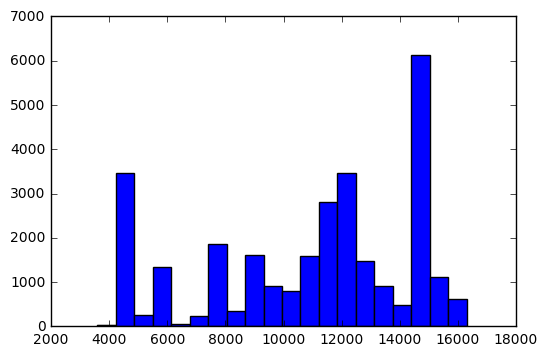

In [34]:
ip_dist = []
for i in range(1,len(long_dist)):
    ip_dist.append(haversine(long_dist[0],long_dist[i],lat_dist[0],lat_dist[i]))
plt.hist(ip_dist,20)

In [ ]:
print(numpy.mean(ip_dist))
print(numpy.max(ip_dist))

(array([   23.,  3472.,   248.,  1351.,    62.,   229.,  1869.,   345.,
         1607.,   911.,   796.,  1587.,  2807.,  3468.,  1486.,   917.,
          488.,  6125.,  1126.,   611.]),
 array([  3596.34426458,   4231.35984367,   4866.37542275,   5501.39100184,
          6136.40658092,   6771.42216   ,   7406.43773909,   8041.45331817,
          8676.46889726,   9311.48447634,   9946.50005542,  10581.51563451,
         11216.53121359,  11851.54679268,  12486.56237176,  13121.57795084,
         13756.59352993,  14391.60910901,  15026.6246881 ,  15661.64026718,
         16296.65584626]),
 <a list of 20 Patch objects>)

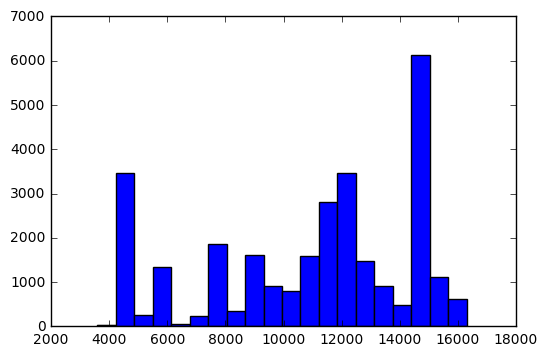

In [28]:
ip_dist = []
for i in range(len(long_dist)):
    if i != 1:
        ip_dist.append(haversine(long_dist[1],long_dist[i],lat_dist[1],lat_dist[i]))
plt.hist(ip_dist,20)

In [ ]:
print(numpy.mean(ip_dist))
print(numpy.max(ip_dist))

In [77]:
ip_dist = []
k = 4250
j = 1760
print(long_dist[k],lat_dist[k])
print(long_dist[j],lat_dist[j])
hav = haversine(long_dist[k],long_dist[j],lat_dist[k],lat_dist[j])
print(hav)

'''

for i in range(len(long_dist)):
     
     #if hav<4000:
     ip_dist.append(hav)
plt.hist(ip_dist,10)
print(numpy.mean(ip_dist))
print(numpy.min(ip_dist))'''

-86.9237 40.4427
127.0 37.567
4341.126264501832


'\n\nfor i in range(len(long_dist)):\n     \n     #if hav<4000:\n     ip_dist.append(hav)\nplt.hist(ip_dist,10)\nprint(numpy.mean(ip_dist))\nprint(numpy.min(ip_dist))'